### Goal:
## Explore the Coffe sales dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
 

### 1. Why This Project?
 
#### 1.Learn data cleaning and preprocessing using Pandas.
 
#### 2.Use NumPy and Pandas for calculations.
 
#### 3.Visualize data using Matplotlib and Seaborn.
 
#### 4.Derive business insights.

### 2. Import Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [2]:
df = pd.read_csv('Coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


### 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (3547, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64
       hour_of_day        money  Weekdaysort    Monthsort
co

### Insights :

1. Columns like hour_of_day, money are numeric; others are categorical (coffee_name, cash_type, Time_of_Day, Weekday, Month_name).

2. Missing values may exist in money, coffee_name, cash_type, and Time_of_Day.

3. Distribution of sales across weekdays and months can be observed

### 5. Data Cleaning

In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where Date conversion failed
df = df.dropna(subset=['Date'])

# Fill missing 'money' with mean
df['money'] = df['money'].fillna(df['money'].mean())

# Fill missing 'coffee_name' with 'Unknown'
df['coffee_name'] = df['coffee_name'].fillna('Unknown')

# Fill missing 'cash_type' with mode
df['cash_type'] = df['cash_type'].fillna(df['cash_type'].mode()[0])

# Fill missing 'Time_of_Day' with mode
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

# Fill missing 'hour_of_day' with median
df['hour_of_day'] = df['hour_of_day'].fillna(df['hour_of_day'].median())

# Drop rows with missing Weekday (critical)
df = df.dropna(subset=['Weekday'])

# Reset index
df.reset_index(drop=True, inplace=True)

# Check cleaned dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB
None


### Insights :

1. All numeric columns now have valid values.

2. Categorical columns missing values are handled with mode or placeholder.

3. Invalid or missing dates are removed.

4. Dataset is ready for analysis.

### 6. Analysis with Numpy & Pandas

In [8]:
total_sales_per_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print("Total Sales per Coffee:\n", total_sales_per_coffee)

# Average sales per hour
avg_sales_hour = df.groupby('hour_of_day')['money'].mean()
print("\nAverage Sales per Hour:\n", avg_sales_hour)

# Total sales by Time_of_Day
sales_time_of_day = df.groupby('Time_of_Day')['money'].sum()
print("\nTotal Sales by Time of Day:\n", sales_time_of_day)

# Total sales by Weekday
sales_weekday = df.groupby('Weekday')['money'].sum()
print("\nTotal Sales by Weekday:\n", sales_weekday)

# Total sales by Month
sales_month = df.groupby('Month_name')['money'].sum()
print("\nTotal Sales by Month:\n", sales_month)

Total Sales per Coffee:
 coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64

Average Sales per Hour:
 hour_of_day
6     29.880000
7     32.341136
8     29.863319
9     30.017686
10    31.093049
11    29.869611
12    30.786805
13    31.238933
14    31.883556
15    31.678051
16    32.488633
17    32.319662
18    32.855963
19    33.851354
20    33.011361
21    32.809949
22    32.169558
Name: money, dtype: float64

Total Sales by Time of Day:
 Time_of_Day
Afternoon    38130.04
Morning      35929.20
Night        38186.34
Name: money, dtype: float64

Total Sales by Weekday:
 Weekday
Fri    16802.66
Mon    17363.10
Sat    14733.52
Sun    13336.06
Thu    16091.40
Tue    18168.38
Wed    15750.46
Name: money, dtype: float64

Total Sales by Month:
 Month_n

### Insights :

1. Best-selling coffee types can be identified.

2. Peak sales hours help with staffing and promotions.

3. Morning vs afternoon vs evening sales trends can be compared.

4. Weekday and monthly trends indicate seasonal or weekly patterns.

### 7.Visualization with Matplotlib

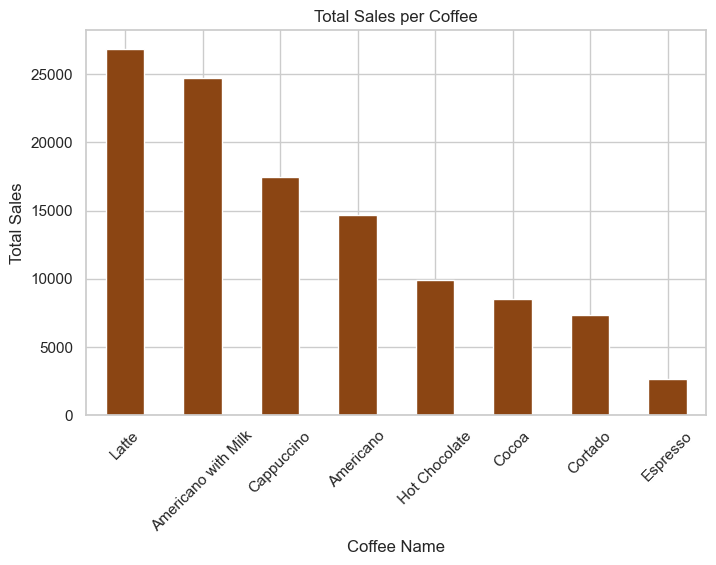

In [9]:
plt.figure(figsize=(8,5))
total_sales_per_coffee.plot(kind='bar', color='saddlebrown')
plt.title('Total Sales per Coffee')
plt.xlabel('Coffee Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Insights :

1. Coffee types with highest revenue are visible.

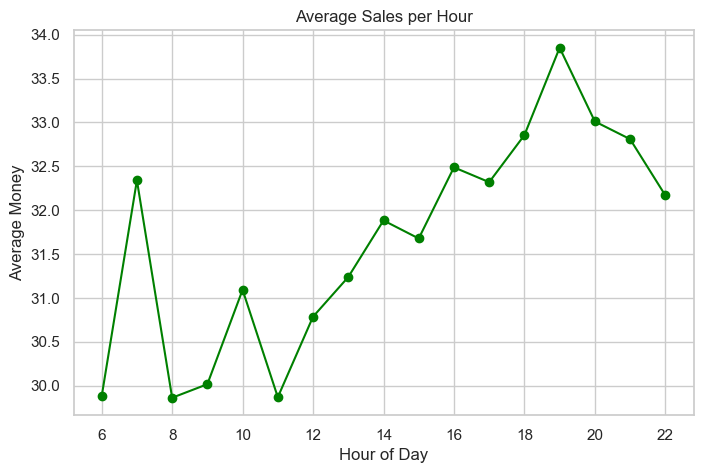

In [10]:
plt.figure(figsize=(8,5))
avg_sales_hour.plot(kind='line', marker='o', color='green')
plt.title('Average Sales per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Money')
plt.grid(True)
plt.show()


### Insights :

1. Peak hours are clearly identified.

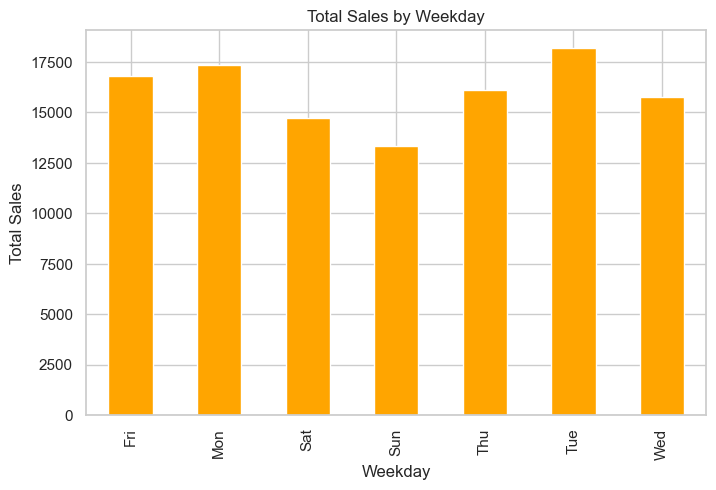

In [11]:
plt.figure(figsize=(8,5))
sales_weekday.plot(kind='bar', color='orange')
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()

### Insights :

1. Sales trend across weekdays can guide staffing.

### 8. Visualization with Seaborn

C:\Users\dell\AppData\Local\Temp\ipykernel_41656\482581513.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_per_coffee.index, y=total_sales_per_coffee.values, palette='coolwarm')


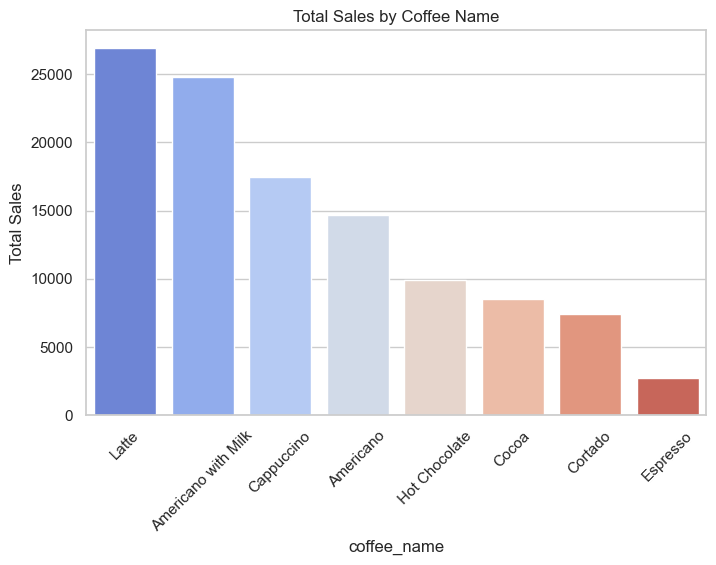

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=total_sales_per_coffee.index, y=total_sales_per_coffee.values, palette='coolwarm')
plt.title('Total Sales by Coffee Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Insights :

1. Confirms which coffee is the most profitable.

C:\Users\dell\AppData\Local\Temp\ipykernel_41656\3888160000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_time_of_day.index, y=sales_time_of_day.values, palette='Set2')


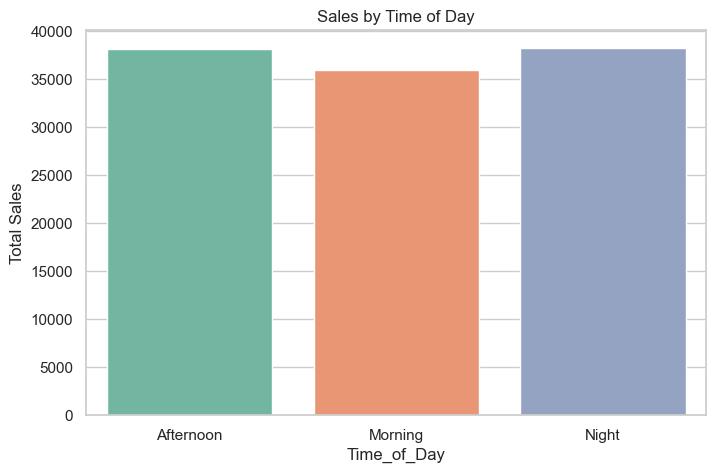

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=sales_time_of_day.index, y=sales_time_of_day.values, palette='Set2')
plt.title('Sales by Time of Day')
plt.ylabel('Total Sales')
plt.show()

### Insights :

1. Time of Day sales trends help plan peak/off-peak strategies.

C:\Users\dell\AppData\Local\Temp\ipykernel_41656\418350611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='coffee_name', y='money', data=df, palette='Set3')


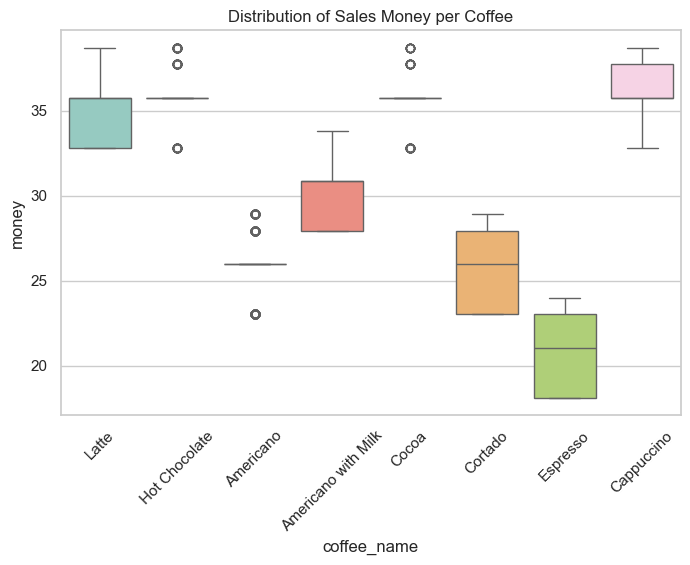

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='coffee_name', y='money', data=df, palette='Set3')
plt.title('Distribution of Sales Money per Coffee')
plt.xticks(rotation=45)
plt.show()

### Insights :

1. Boxplot shows spread of sales money per coffee — identifies outliers or high-value transactions.

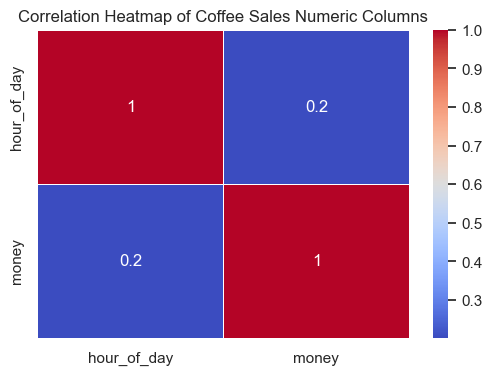

In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Select numeric columns for correlation
numeric_cols = df[['hour_of_day', 'money']]

# Compute correlation matrix
corr_coffee = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_coffee, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Coffee Sales Numeric Columns')
plt.show()

### Insights :

1. Shows if hour_of_day impacts money (sales).

2. High correlation suggests peak hours strongly influence revenue.